# Lab 16

Today, we will continue our journey through the classification task within supervised learning. Today we will explore some of the ingredients of decision trees before learning how to implement them in `sklearn`. Today's goals are: 

0. Explain why SVMs and decision trees are different approaches to classification 
1. Define the Gini Index 
2. Detail the process for decision trees. 

### Imports for Today

We begin as usual, importing the packages and data that we need. 

In [1]:
## Import block
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

/anaconda3/envs/csc294/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Add a conda package!

If you got a (non-deprecation) error, you may need to exit jupyter and add `pydot` to your conda environment. 

In [ ]:
def gini_leaf(leaf_data):
    pass

def gini_decision(list_leaves):
    pass

def info_gain(list_leaves):
    pass

def apply_decision(input_data, variable, answer_list):
    pass

In [ ]:
# For function testing 



In [2]:
## Import Data

weather_data = np.genfromtxt("lab16data.csv", delimiter=',', skip_header=1)
weather_pd = pd.read_csv("lab16data.csv", sep = ",")


## From SVMs to Decision Trees

In our discussion of SVMs, we did not attempt to interpret nor to explain _why_ one data point gets classified where it does. We have a boundary and we might be able to twist ourselves into an "explanation" but we may want a transparent set of questions that lead us to our classifications. This is the intuition behind **decision trees.**

Decision trees are trees where each **branch** represents a decision based on a specific variable. Consider the following situation; we want to classify days into likely to rain and unlikely to rain. Our goal is to build something like this infographic that tells us how to decide if it will rain or not: 

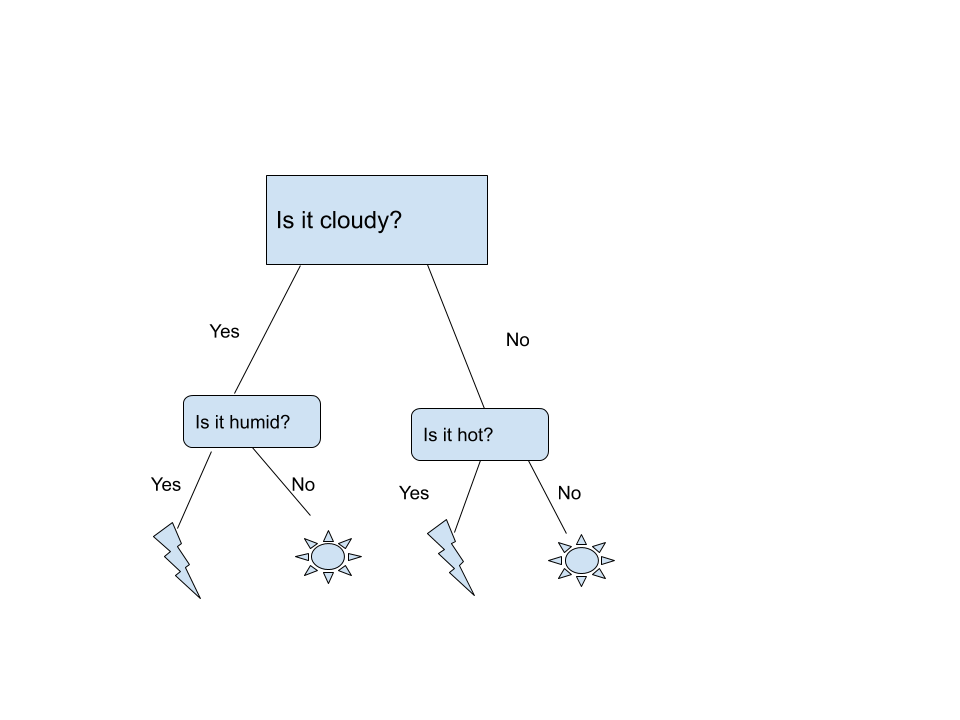

At the top **node,** we represent our first decision. Then based on whether a morning is cloudy or not, we either examine the humidity or the temperature of the day. 

The bottom nodes of a decision tree are called **leaves.** Each leaf is the group of data points that followed the series of decisions encoded in that branch. (A _leaf_ is a node with no branches under it.)

### Gini Impurity - A goodness measure for decision trees

As we make these decisions, we want to quantify the "goodness" of our decisions. The **Gini Impurity** is one such way that we can quantify goodness. (Annoyingly, most definitions of the Gini Index use the word of "purity" to describe "homogenity" or the proportion of things that are the same in the current node. We're going to use the word "homogenity.") 

#### Gini for a leaf

For each leaf, we compute the Gini Impurity as follows:

\begin{equation}
\textrm{Gini Impurity}_{leaf} = 1 - \sum_{C, possible classes}\left(\dfrac{\textrm{data points in the leaf in class C}}{\textrm{total in the leaf}}\right)^2
\end{equation}

Let's try an example. Suppose there are 7 humid cloudy mornings. Of those, five end-up as rainy days and 2 end up as not rainy. What is the Gini Impurity of this node? 

For good measure let's compute another Gini value. Suppose there are 10 cloudy but not humid days. Of those, it rains on 3 of them (and the rest are non-rainy). What is the Gini for this leaf? 

**Questions** 
* What does it mean for a leaf to have a Gini value of 1?
* What does it mean for a leaf to have a Gini value of 0?

**Your Turn** Add to the `gini_leaf` function so that it computes the Gini value for a leaf based on the data in that leaf.

#### Gini for the decision

For the leaves that we are looking at, our last decision was based on the humidity of the morning. Using the Gini values for each of the resulting leaves, we can determine a Gini value for the humidity node in terms of the answer to the humidity question as follows: 

\begin{equation}
\textrm{Gini Impurity}_{node} = 1 - \sum_{L, possible leaves/answers}\left(\dfrac{\textrm{data points in the leaf/answer}}{\textrm{total data asked the question}}\right)^2
\end{equation}

Applying this to our situation, we would have 

\begin{equation}
\textrm{Gini Impurity}_{humid} = 1 - \left(\dfrac{\textrm{days that are humid}}{\textrm{total data cloudy days}}\right)^2 - \left(\dfrac{\textrm{days that are not humid}}{\textrm{total data cloudy days}}\right)^2
\end{equation}

Compute this value. 

**Questions** 
* What does it mean for a decision to have a Gini value of 1?
* What does it mean for a decision to have a Gini value of 0?
* Are either of these situations possible? 

**Your Turn** Add to the `gini_decision` function so that it computes the Gini value for a decision based on the data in that decision is applied to.



### Information Gain 

At this point, we've computed some notion of how homogenous the leaves that result from our humidity decision is. But we have no concept of if this is "good" or not. To encode that, we compute **information gain** or how much did we learn by splitting our days on their humidity. 

Computing information gain uses as weighted aggregate of the Gini values:

\begin{equation}
\textrm{Information Gain}_{node} = \textrm{Gini Impurity}_{node} - \sum_{L}\left(\dfrac{\textrm{data points in the leaf}}{\textrm{total data asked the question}}\right)*\textrm{Gini of Leaf}
\end{equation}

Or to put it more concretely for our situation:

\begin{equation}
\textrm{Information Gain}_{humid} = \textrm{Gini Impurity}_{humid} - \left(\dfrac{\textrm{days that are humid}}{\textrm{total data cloudy days}}\right)*\textrm{Gini humid} - \left(\dfrac{\textrm{days that are not humid}}{\textrm{total data cloudy days}}\right)*\textrm{Gini of not humid}
\end{equation}

Compute the information gain for our situation. 

**Your Turn** Add to the `info_gain` function so that it computes the information gain for a decision based on the data in that leaf. 


#### Reference for this block
(The above block was heavily based on [this post](https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93))

## Intuition for decision trees

In decision trees, we start with all the data and try various decisions for splitting our data. Each decision uses **exactly** one variable, but can have more than 2 answers. To decide which decision is best, we select the one that has the best information gain. Then we repeat the process on each leaf that is created until either 1) a leaf has a Gini value of 1 or 2) you have run out of variables to use in the path to that node. 


### Splitting data

Before continuing, let's make a function `apply_decision` that takes in 1) input data, 2) the variable that you would like to use in your current decision, and 3) the list of possible decisions (or boolean statements) you are allowing. The output should be a tuple of the leaves that result from that decision. 

### Your turn!

The data today is (truly made-up) weather data. The variables are:
* cloudy
* humid
* temp	
* rained_yesterday
* raining_today

Each variable only has two possibilities: `1` (yes) and `0` (no). Our goal is classify days into either raining today or not raining today. Iterating over each possible input, compute the information gain and decide which is the "right" first decision. 

When you find the first decision, then continue the process on each resulting leaf. Keep track of your decisions (as a tree) as well as your information gains and gini values for each decision. _Note:_ your resulting tree should be only have a max of three decisions (the top and two lower) and a resulting four leaves. 

## Decision Trees in `sklearn`

Now that we've created a hand crafted table, let's see how decision trees in `sklearn` work. 

It should come as no surprise that we will first specify our decision tree model, and then fit the decision tree model to our data. 

In [3]:
# Split into the input variables and the target classes
in_weather = weather_data[:,:4]
out_class = weather_data[:,4]

# Get the variable names 
var_names = list(weather_pd.columns)[:4]

In [4]:
# Specify our model
dt = DecisionTreeClassifier()

In [5]:
# Fit our model to the data
dt.fit(in_weather, out_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Umm... this is not easy to "look" at. Referring again to [this post](https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93), we adjust their code to create a visual output of our decision tree: 

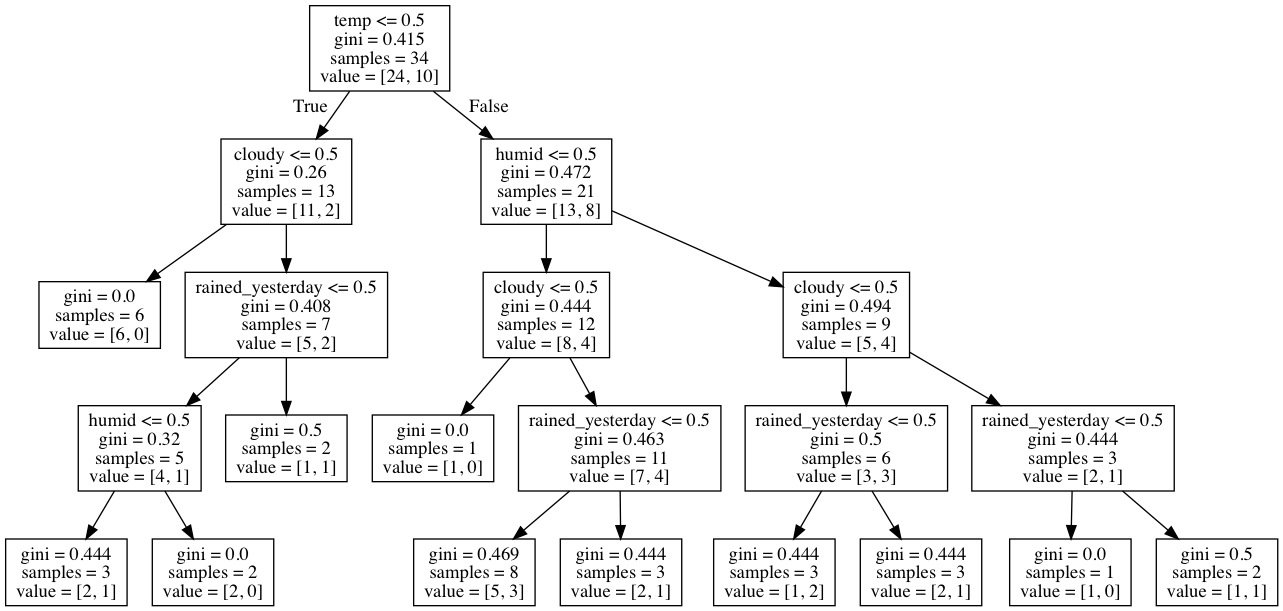

In [6]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=var_names)
(dt_vis, ) = graph_from_dot_data(dot_data.getvalue())

Image(dt_vis.create_png())

**Question** What do you notice about this image? What is encoded? What is left out? 

### Next time

Next time, we will look at ensemble methods which aggregates several methods together. The specific example that we will explore are **random forests.**

### Final Thoughts

To finish up this lab, take a picture of your handcrafted decision tree and create an image of your `sklearn` decision tree. Are they the same? Share your plot and thoughts in a post on **#lab_submission** channel on slack with your answer. Your post must start with **Lab15** to get credit.  

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab15**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources consulted 

0. [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/)
1. [SDS 293 Notes by R. Jordan Crouser](http://www.science.smith.edu/~jcrouser/SDS293/)
2. [Decision Tree In Python](https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93)
3. [Decision Tree Algorithm With Hands On Example](https://medium.com/datadriveninvestor/decision-tree-algorithm-with-hands-on-example-e6c2afb40d38)